In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [7]:
dam_df = pd.read_csv('dam_occupancy.csv')

In [9]:
dam_df.head()

,DATE,GENERAL_DAM_OCCUPANCY_RATE,GENERAL_DAM_RESERVED_WATER
0,2005-01-01,44.62,388
1,2005-01-02,44.62,388
2,2005-01-03,44.47,386
3,2005-01-04,44.42,386
4,2005-01-05,44.35,385


In [10]:
dam_df.drop('DATE',axis =1, inplace= True)

In [12]:
dam_df.isnull().sum()

GENERAL_DAM_OCCUPANCY_RATE    0
GENERAL_DAM_RESERVED_WATER    0
dtype: int64

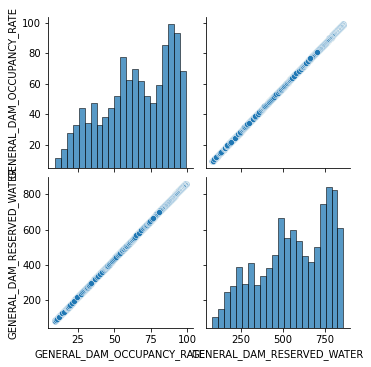

In [13]:
sns.pairplot(dam_df)

<AxesSubplot:xlabel='GENERAL_DAM_OCCUPANCY_RATE', ylabel='GENERAL_DAM_RESERVED_WATER'>

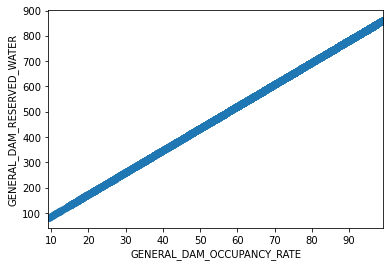

In [14]:
sns.regplot(x =dam_df['GENERAL_DAM_OCCUPANCY_RATE'],y= dam_df['GENERAL_DAM_RESERVED_WATER'])

In [29]:
X = dam_df[['GENERAL_DAM_OCCUPANCY_RATE']]
y = dam_df['GENERAL_DAM_RESERVED_WATER']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state =1)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
print(lm.coef_)

[8.68742437]


In [35]:
print(lm.intercept_)

-0.08114471309875171


In [36]:
coef = pd.DataFrame(data = lm.coef_, index = X.columns, columns =['Coefficent'])

In [37]:
coef

,Coefficent
GENERAL_DAM_OCCUPANCY_RATE,8.687424


In [38]:
pred = lm.predict(X_test) # always use X_test to do the prediction

In [39]:
pred

array([535.32481907, 781.26580292, 840.86153408, ..., 832.78222942,
       761.28472687, 553.82903297])

In [41]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999975920507904


In [42]:
from sklearn import metrics

In [47]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_absolute_error(y_test,pred))
print('RMsE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.26488596187807706
MSE: 0.26488596187807706
RMsE: 0.3160332243183738


In [48]:
df = pd.DataFrame({'Actual_Data':y_test, 'Predicted_Data':pred})

In [49]:
df

,Actual_Data,Predicted_Data
2796,535,535.324819
5241,781,781.265803
3762,841,840.861534
958,213,212.500130
1163,319,319.007952
...,...,...
2723,745,744.691746
3727,825,825.311044
2295,833,832.782229
4103,761,761.284727


In [50]:
df_isn =pd.read_csv('insurance.csv')

In [51]:
df_isn.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df_isn.isnull().sum() #to check for missing values 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df_isn['region'].unique() #check values

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [55]:
df_isn['sex']= pd.get_dummies(df_isn['sex'],drop_first = True)
df_isn['smoker']= pd.get_dummies(df_isn['smoker'],drop_first = False)

In [57]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_isn['region']= enc.fit_transform(df_isn['region'])

In [58]:
df_isn.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


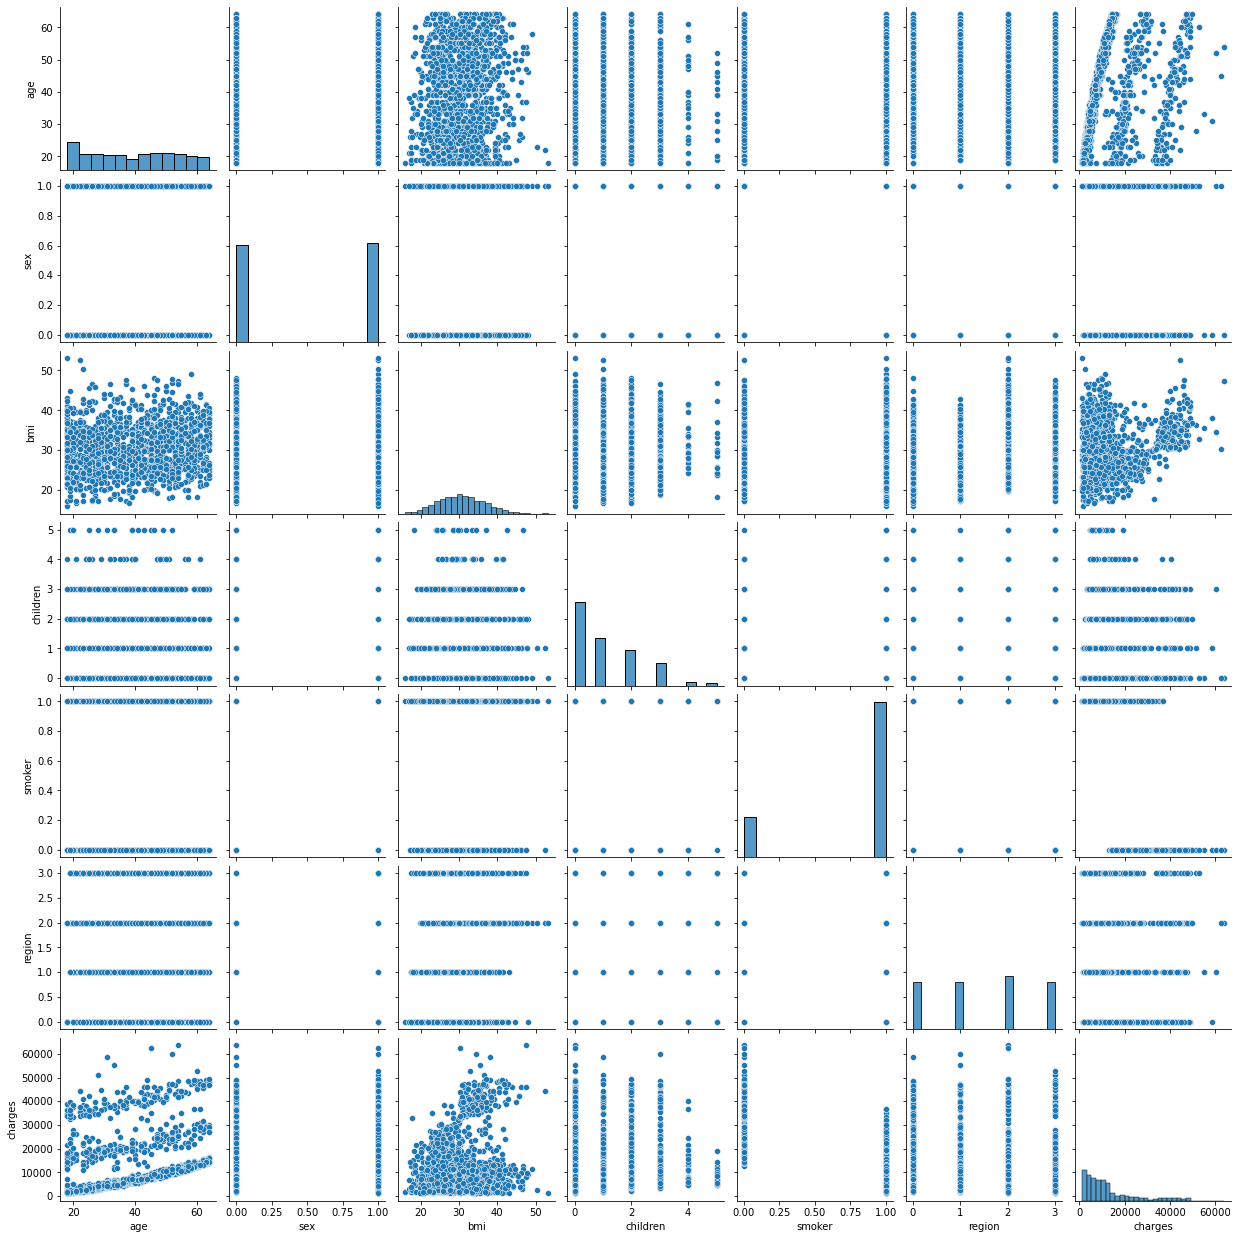

In [59]:
sns.pairplot(df_isn)

In [60]:
X =df_isn.drop('charges',axis = 1)
y =df_isn['charges']

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=1)

In [65]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [68]:
print(lm2.coef_)

[   252.15440619   -281.16765835    316.514758      351.46251009
 -24044.37169738   -318.49464584]


In [70]:
print(lm2.intercept_)

13107.815259883193


In [72]:
pred2 = lm2.predict(X_test)

In [73]:
pred2

array([ 4.50048433e+03,  1.28194579e+04,  1.23977127e+04,  1.34303433e+04,
        5.31776110e+02,  3.22642696e+04,  1.30762461e+04,  1.22348298e+04,
        3.82932402e+03,  3.01565286e+04,  1.13198257e+04,  1.72084618e+04,
        8.91832075e+03,  8.22883518e+03,  3.58166904e+03,  1.01918742e+04,
        3.97134424e+03,  6.75521017e+03,  1.52141457e+04,  1.42498228e+04,
        1.24184207e+04,  3.34497470e+04,  9.12417099e+03,  8.85380484e+03,
        3.13406481e+03,  8.14417612e+03,  9.33914668e+03,  1.10793027e+04,
        7.54531559e+03,  4.40537383e+03,  1.39112972e+04,  5.64886526e+03,
        3.46827850e+04,  2.74022377e+04,  3.38105315e+04,  9.52560370e+03,
        3.06087668e+04,  2.67066855e+04,  1.54113111e+04,  3.41398489e+04,
        6.63468968e+03,  1.39736793e+04,  1.08971678e+04,  1.47980620e+04,
        4.09741953e+03,  1.29622798e+04,  4.71597335e+03,  2.92771692e+04,
        7.31791501e+03,  1.39529721e+04,  1.35190763e+04,  1.20798653e+04,
        2.00264361e+03,  

In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred2))

0.740367716897532


In [76]:
coef = pd.DataFrame(data = lm2.coef_,index = X.columns,columns = ['coefficent'])

In [77]:
coef

,coefficent
age,252.154406
sex,-281.167658
bmi,316.514758
children,351.462510
smoker,-24044.371697
region,-318.494646


In [78]:
from sklearn import metrics 

In [82]:
print('MAE:',metrics .mean_absolute_error(y_test,pred2))
print('MSE:',metrics .mean_squared_error(y_test,pred2))
print('MAE:',np.sqrt(metrics.mean_squared_error(y_test,pred2)))

MAE: 4139.313074268246
MSE: 36794223.343517005
MAE: 6065.824209744048
